In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load dataset
df = pd.read_csv(r"C:\Users\Blake Powell\Downloads\Titanic-Dataset.csv")

# Drop unhelpful columns
df = df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"])

# Handle missing values
df["Age"] = df["Age"].fillna(df["Age"].median())
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

# Features and target
X = df.drop("Survived", axis=1)
y = df["Survived"]

# Preprocessing (one-hot encode categorical columns)
categorical_features = ["Sex", "Embarked"]
preprocessor = ColumnTransformer(
    transformers=[("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)],
    remainder="passthrough"
)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Random Forest pipeline
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(random_state=42))
])

# Train model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred, target_names=["Did not survive", "Survived"]))
print(confusion_matrix(y_test, y_pred))



                 precision    recall  f1-score   support

Did not survive       0.81      0.88      0.84       110
       Survived       0.78      0.67      0.72        69

       accuracy                           0.80       179
      macro avg       0.79      0.77      0.78       179
   weighted avg       0.80      0.80      0.80       179

[[97 13]
 [23 46]]


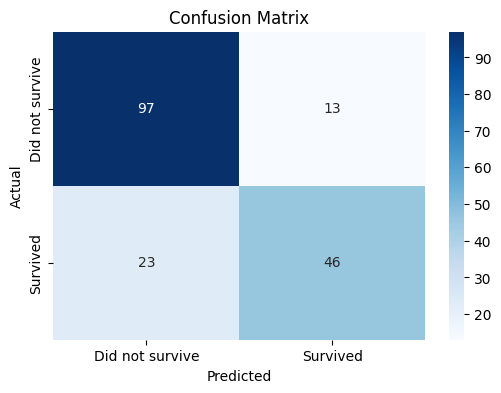

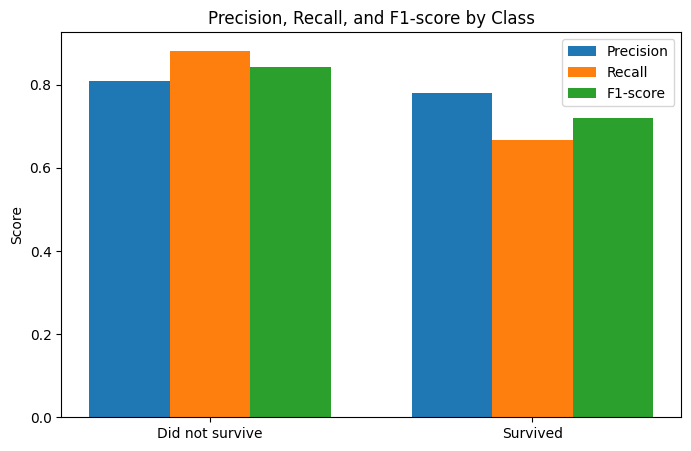

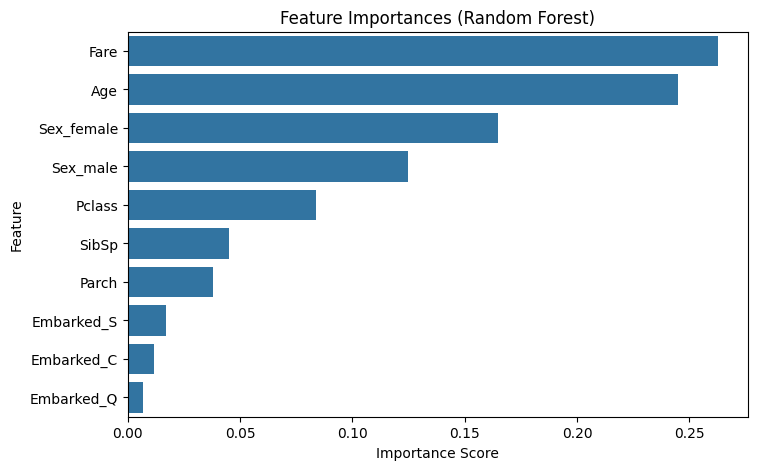

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

# 1. Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Did not survive", "Survived"], yticklabels=["Did not survive", "Survived"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# 2. Precision, Recall, F1-score Bar Chart
from sklearn.metrics import precision_recall_fscore_support

metrics = precision_recall_fscore_support(y_test, y_pred, labels=[0,1])
labels = ["Did not survive", "Survived"]

plt.figure(figsize=(8,5))
x = range(len(labels))
plt.bar(x, metrics[0], width=0.25, label="Precision")
plt.bar([p+0.25 for p in x], metrics[1], width=0.25, label="Recall")
plt.bar([p+0.5 for p in x], metrics[2], width=0.25, label="F1-score")
plt.xticks([p+0.25 for p in x], labels)
plt.ylabel("Score")
plt.title("Precision, Recall, and F1-score by Class")
plt.legend()
plt.show()

# 3. Feature Importance Plot
import numpy as np

# Get feature names after preprocessing
feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
feature_names = list(feature_names) + ["Pclass", "Age", "SibSp", "Parch", "Fare"]

importances = model.named_steps['classifier'].feature_importances_

# Sort features by importance
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8,5))
sns.barplot(x=importances[indices], y=np.array(feature_names)[indices])
plt.title("Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()
